# Problem 2: Logistic Regression and LDA

## You are hired by Government to do analysis on car crashes. You are provided details of car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your predictions.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")
color=sns.color_palette()

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [71]:
df = pd.read_csv('Car_Crash.csv')
#Glimpse of 
df.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [72]:
df.tail()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2
11216,11216,25-39,10.474,survived,airbag,belted,1,m,17,2002,1999.0,deploy,pass,1,0.0,82:110:2


In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(11217, 16)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [14]:
df.isnull().sum()

Unnamed: 0      0
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [15]:
df.describe()

,Unnamed: 0,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11140.000000
mean,5608.000000,431.405309,0.644022,37.427654,2001.103236,1994.177944,0.389141,1.825583
std,3238.213319,1406.202941,0.478830,18.192429,1.056805,5.658704,0.487577,1.378535
min,0.000000,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,2804.000000,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,5608.000000,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,8412.000000,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,11216.000000,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


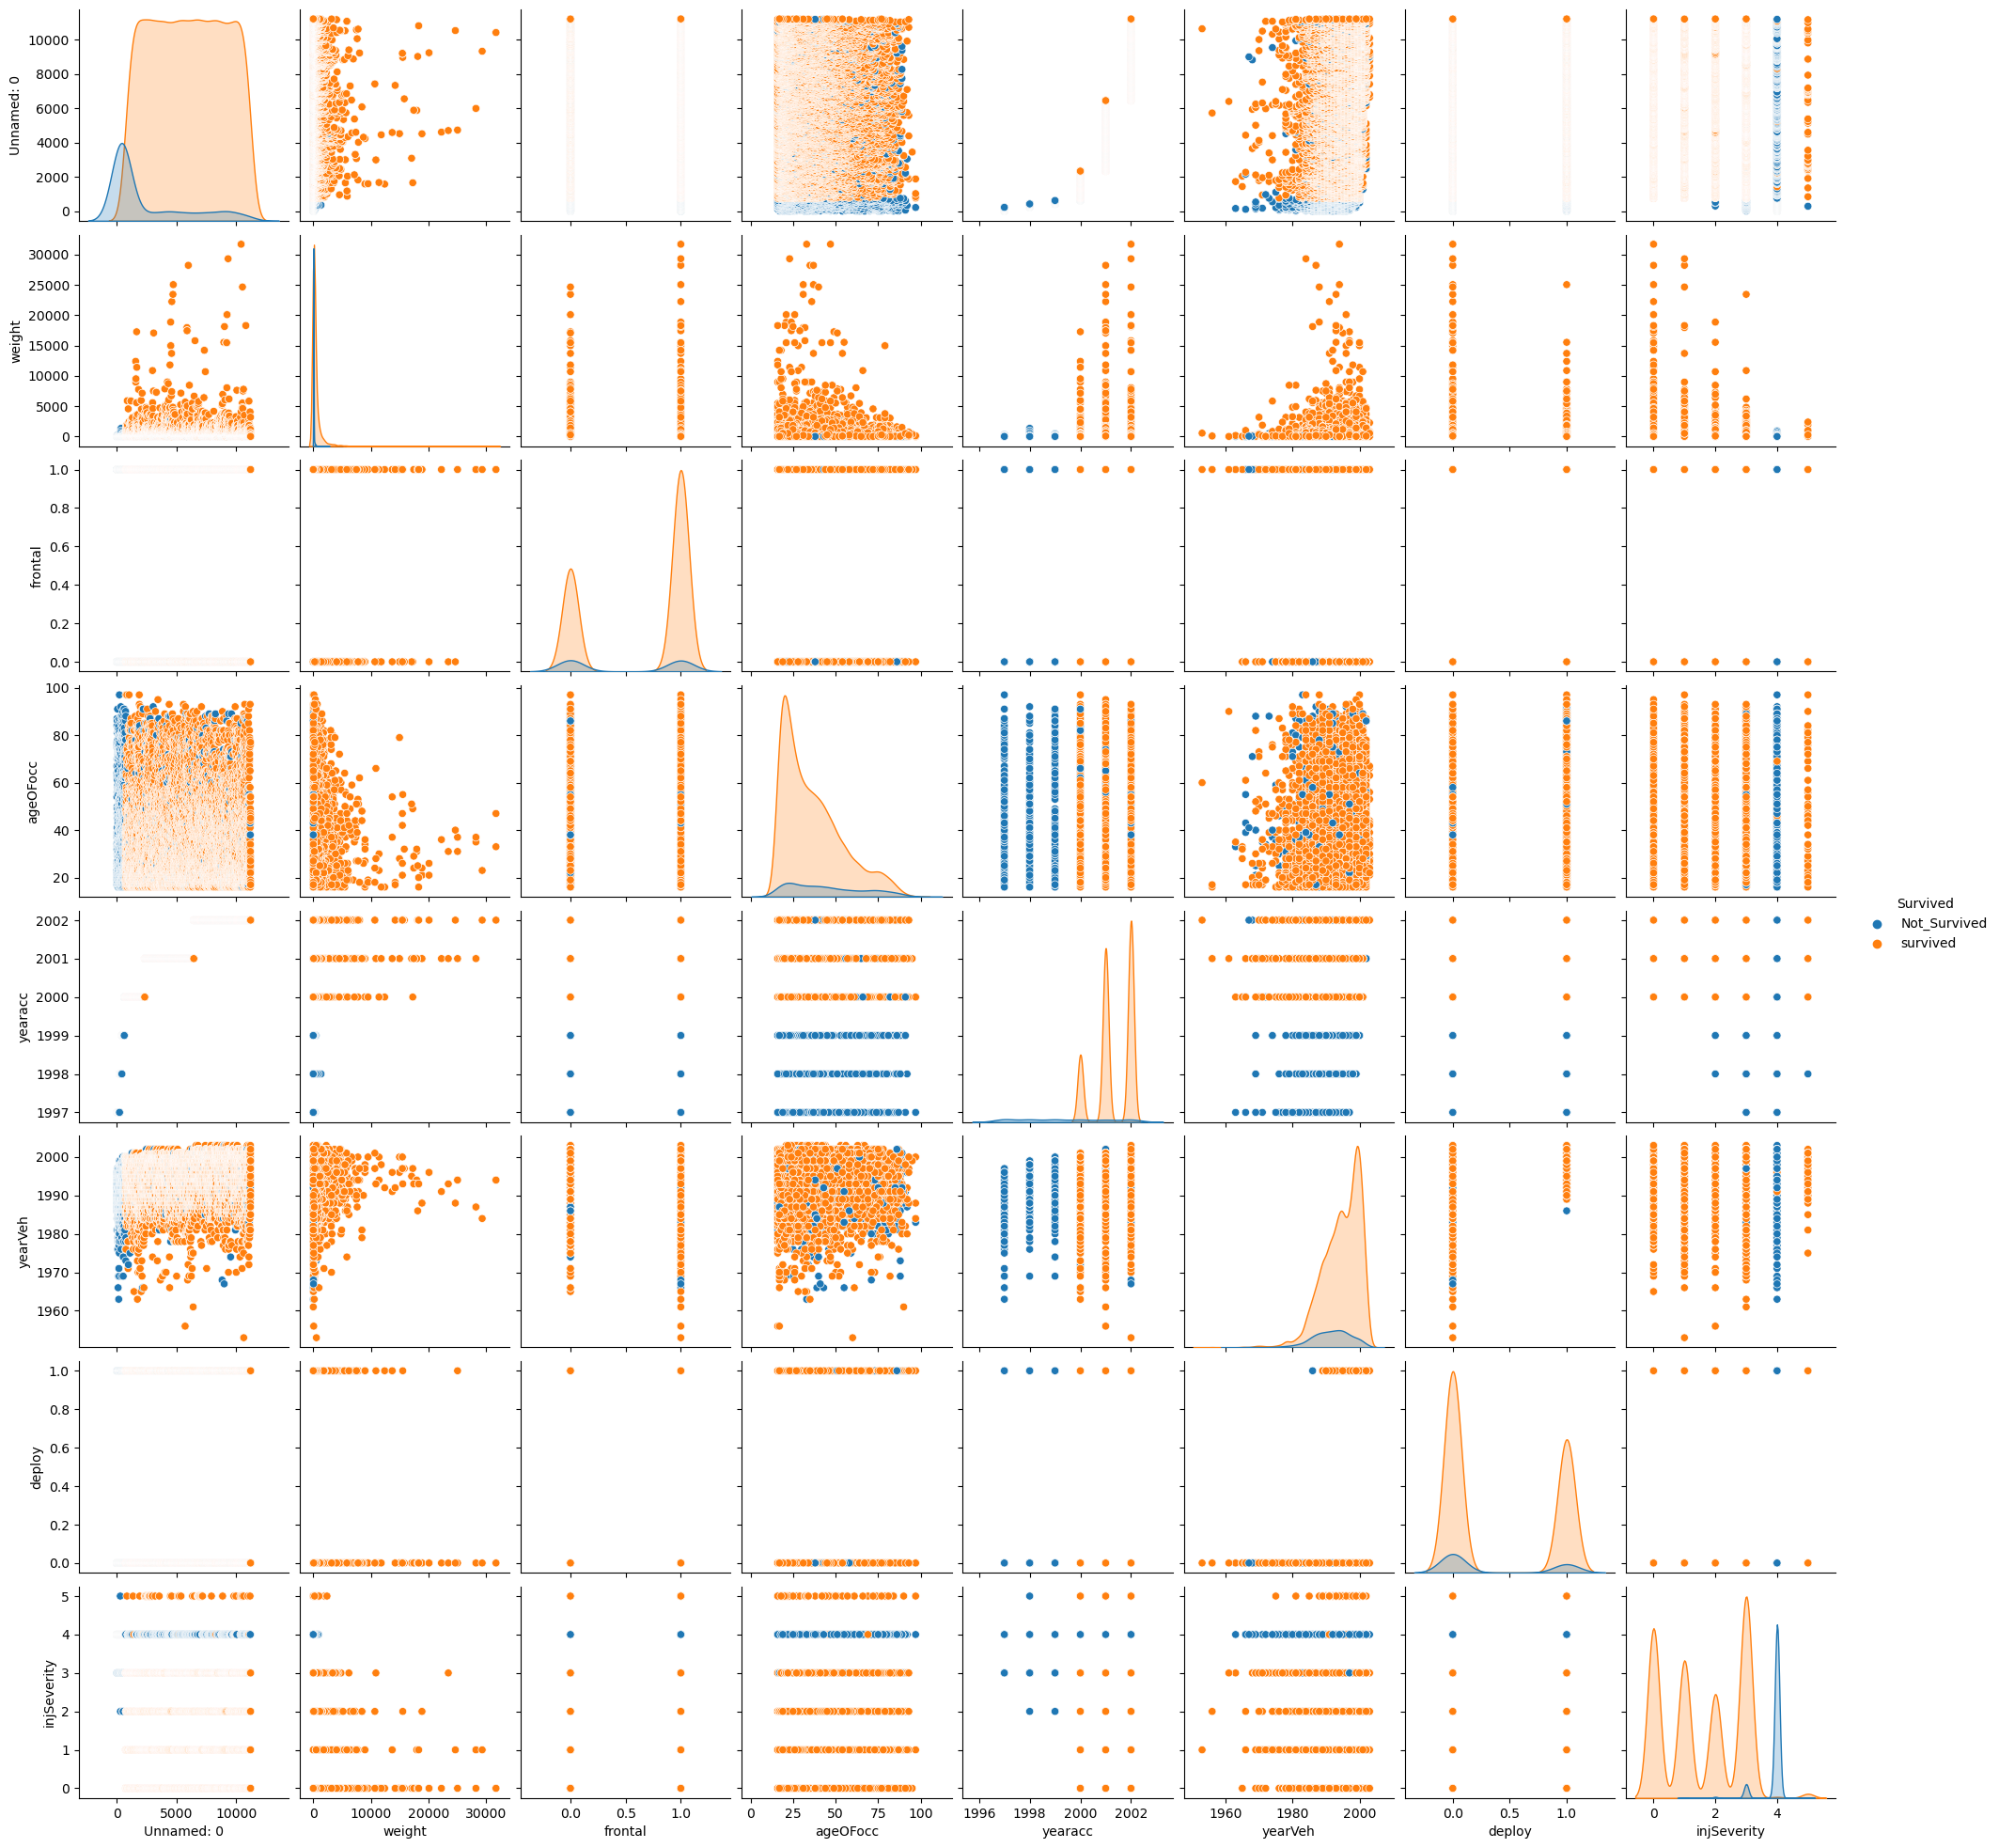

In [73]:
sns.pairplot(df , hue='Survived' , diag_kind = 'kde')

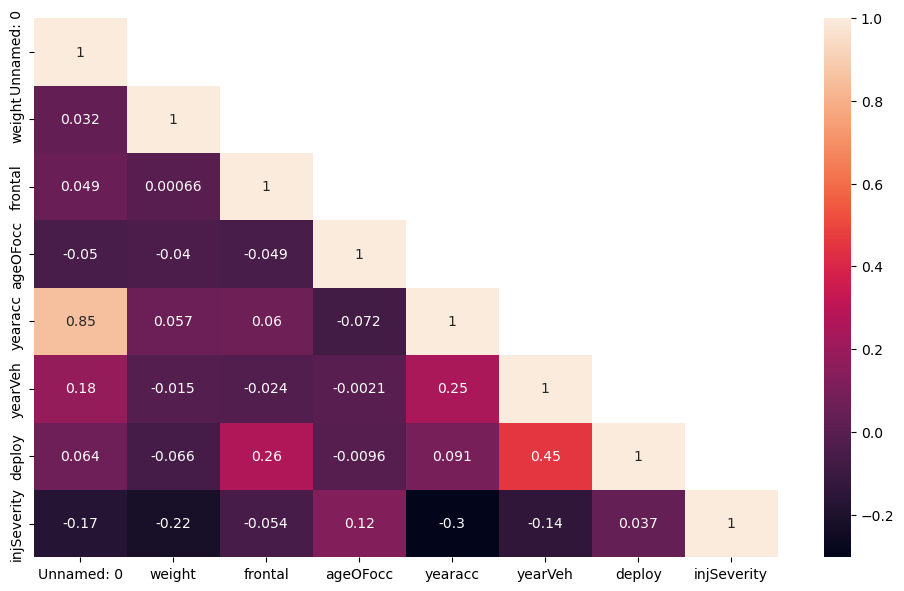

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

In [18]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Unnamed: 0     0
dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['dvcat'] = encoder.fit_transform(df['dvcat'])
df['caseid'] = encoder.fit_transform(df['caseid'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  int32  
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11217 non-null  float64
 15  caseid       11217 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(6)
memory usage: 1.3+ MB


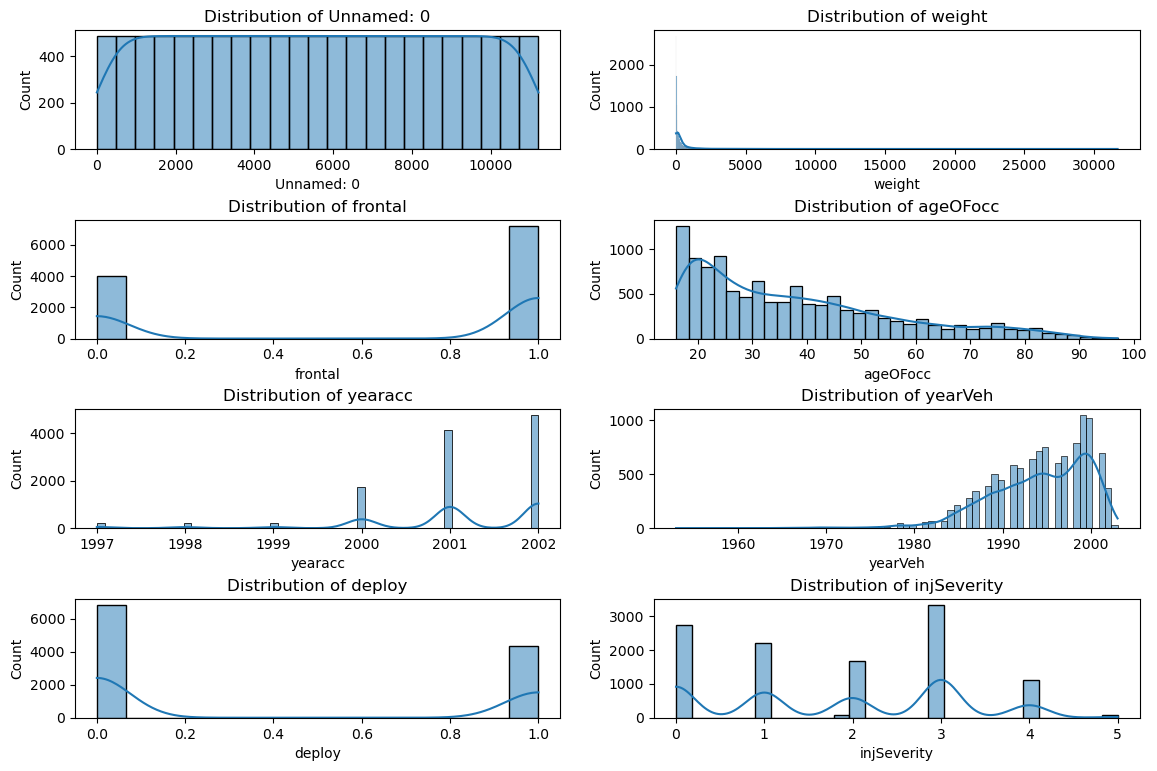

In [21]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns) // 2, ncols=2, figsize=(12, 2 * len(numeric_columns) // 2))
fig.tight_layout(pad=3.0)

for i, column in enumerate(numeric_columns):
    row, col = i // 2, i % 2
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

plt.show()

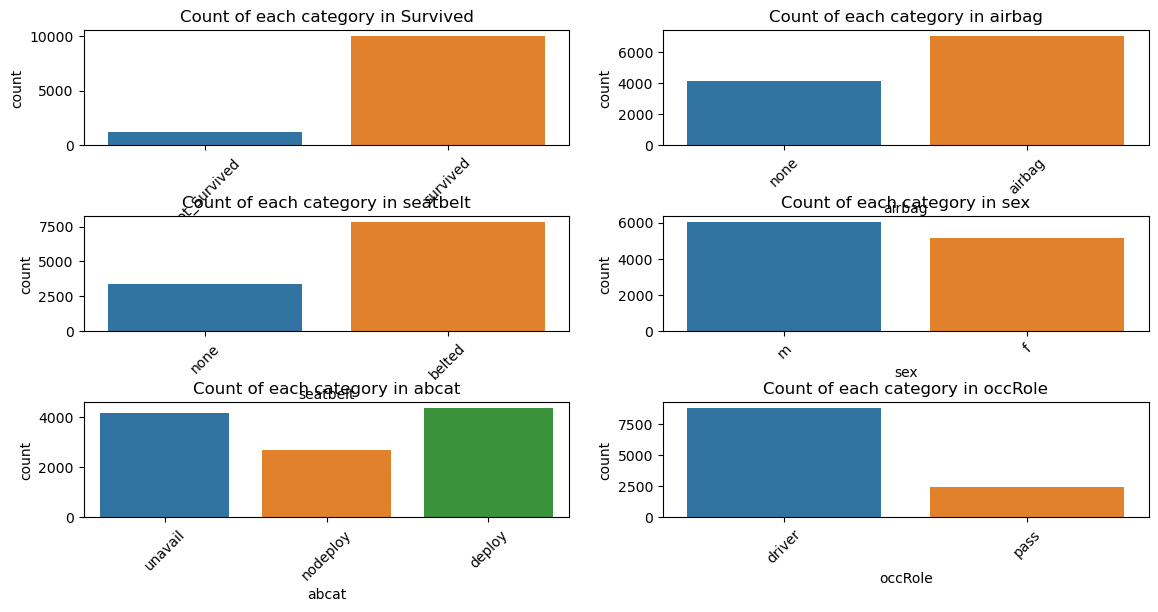

In [22]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns) // 2, ncols=2, figsize=(12, 2 * len(categorical_columns) // 2))
fig.tight_layout(pad=3.0)

for i, column in enumerate(categorical_columns):
    row, col = i // 2, i % 2
    sns.countplot(x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Count of each category in {column}')
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

In [23]:
df['Survived'].value_counts()

survived        10037
Not_Survived     1180
Name: Survived, dtype: int64

In [24]:
df['airbag'].value_counts()

airbag    7064
none      4153
Name: airbag, dtype: int64

In [25]:
df['seatbelt'].value_counts()

belted    7849
none      3368
Name: seatbelt, dtype: int64

In [26]:
df['sex'].value_counts()

m    6048
f    5169
Name: sex, dtype: int64

In [27]:
df['abcat'].value_counts()

deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64

In [28]:
df['occRole'].value_counts()

driver    8786
pass      2431
Name: occRole, dtype: int64

In [29]:
df['caseid'].value_counts()

3841    7
5101    6
3857    6
2750    6
4487    6
       ..
4344    1
4343    1
4341    1
4340    1
1125    1
Name: caseid, Length: 6488, dtype: int64

In [30]:
df['Survived']=np.where(df['Survived'] =='survived', '1', df['Survived'])
df['Survived']=np.where(df['Survived'] =='Not_Survived', '0', df['Survived'])

In [31]:
df['airbag']=np.where(df['airbag'] =='airbag', '1', df['airbag'])
df['airbag']=np.where(df['airbag'] =='none', '0', df['airbag'])

In [32]:
df['seatbelt']=np.where(df['seatbelt'] =='belted', '1', df['seatbelt'])
df['seatbelt']=np.where(df['seatbelt'] =='none', '0', df['seatbelt'])

In [33]:
df['sex']=np.where(df['sex'] =='m', '1', df['sex'])
df['sex']=np.where(df['sex'] =='f', '0', df['sex'])

In [34]:
df['abcat']=np.where(df['abcat'] =='deploy', '1', df['abcat'])
df['abcat']=np.where(df['abcat'] =='unavail', '2', df['abcat'])
df['abcat']=np.where(df['abcat'] =='nodeploy', '3', df['abcat'])

In [35]:
df['occRole']=np.where(df['occRole'] =='driver', '1', df['occRole'])
df['occRole']=np.where(df['occRole'] =='pass', '0', df['occRole'])

In [36]:
df.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,4,27.078,0,0,0,1,1,32,1997,1987.0,2,1,0,4.0,1000
1,1,2,89.627,0,1,1,0,0,54,1997,1994.0,3,1,0,4.0,1010
2,2,4,27.078,0,0,1,1,1,67,1997,1992.0,2,1,0,4.0,1099
3,3,4,27.078,0,0,1,1,0,64,1997,1992.0,2,0,0,4.0,1099
4,4,4,13.374,0,0,0,1,1,23,1997,1986.0,2,1,0,4.0,3160


# 2.2 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA

In [37]:
# Copy all the predictor variables into X dataframe
X = df.drop('Survived', axis=1)

# Copy target into the y dataframe. 
y = df['Survived']

In [38]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['Survived'])

In [39]:
y_train.value_counts(1)

1    0.89479
0    0.10521
Name: Survived, dtype: float64

In [40]:
y_test.value_counts(1)

1    0.894831
0    0.105169
Name: Survived, dtype: float64

# Logistic Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Compare both the models and write inferences, which model is best/optimized.

# Predicting on Training and Test dataset

In [74]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [75]:
# Getting the Predicted Classes and Probs

In [76]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.006077,0.993923
1,0.005128,0.994872
2,0.000041,0.999959
3,0.000117,0.999883
4,0.003493,0.996507


In [46]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.9816583874665648

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

AUC: 0.972


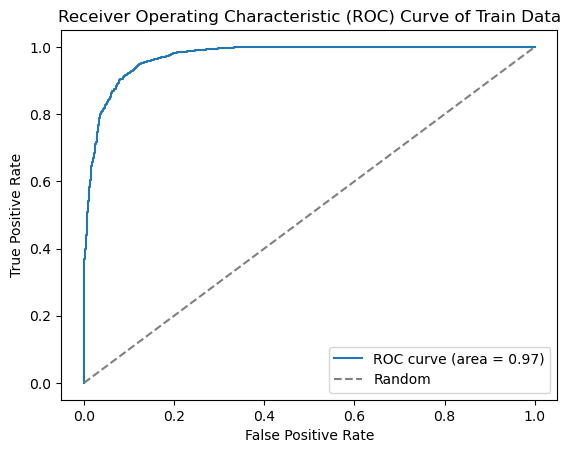

In [77]:
# Assuming model is your classifier
probs = model.predict_proba(X_train)[:, 1]

# Convert labels to integers
y_train_int = y_train.astype(int)

# Calculate AUC
auc = roc_auc_score(y_train_int, probs)
print('AUC: %.3f' % auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_int, probs)

# Plot ROC curve
plt.plot(train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Train Data')
plt.legend()
plt.show()

In [49]:
# Calculate AUC
auc = roc_auc_score(y_train_int, ytrain_predict)

AUC for Test Data: 0.993


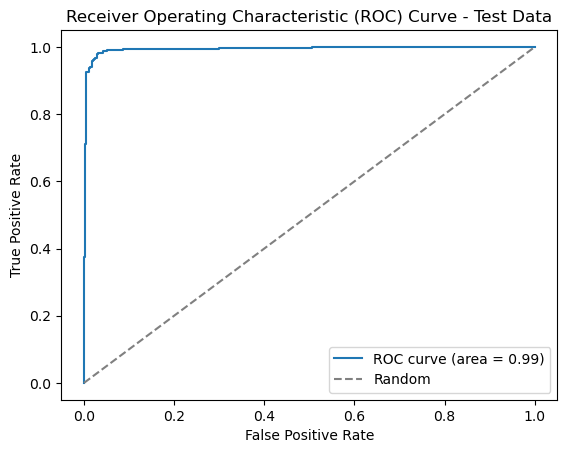

In [50]:
# Assuming model is your classifier
probs_test = model.predict_proba(X_test)[:, 1]

# Convert labels to integers for test data
y_test_int = y_test.astype(int)

# Calculate AUC for test data
auc_test = roc_auc_score(y_test_int, probs_test)
print('AUC for Test Data: %.3f' % auc_test)

# Calculate ROC curve for test data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_int, probs_test)

# Plot ROC curve for test data
plt.plot(test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend()
plt.show()


In [51]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.9836601307189542

In [52]:
# AUC and ROC for the test data

# LDA Model

In [53]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [54]:
from sklearn.preprocessing import StandardScaler
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics


In [56]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

# Prediction

In [57]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

# Training Data and Test Data Confusion Matrix Comparison

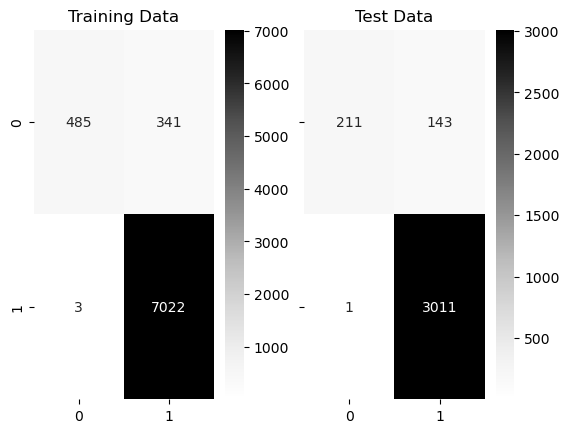

In [58]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Training Data and Test Data Classification Report Comparison

In [59]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.99      0.59      0.74       826
           1       0.95      1.00      0.98      7025

    accuracy                           0.96      7851
   macro avg       0.97      0.79      0.86      7851
weighted avg       0.96      0.96      0.95      7851
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       1.00      0.60      0.75       354
           1       0.95      1.00      0.98      3012

    accuracy                           0.96      3366
   macro avg       0.97      0.80      0.86      3366
weighted avg       0.96      0.96      0.95      3366
 



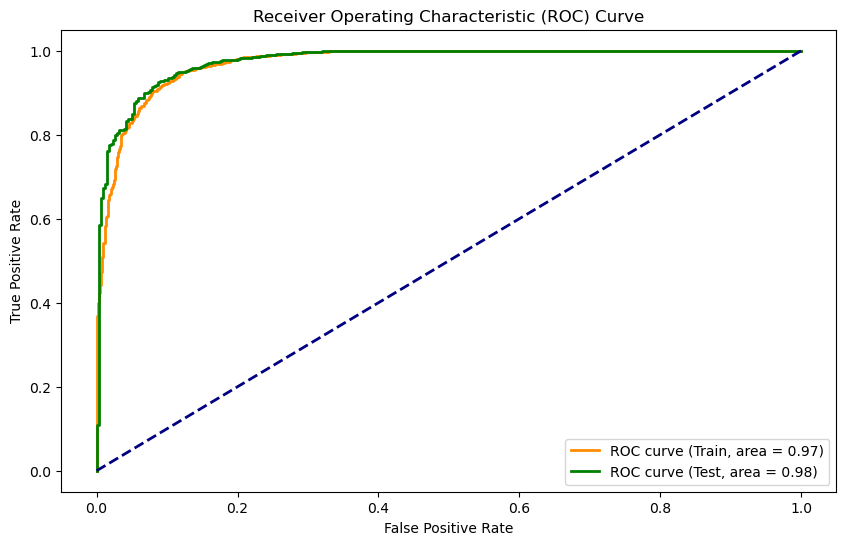

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert labels to binary format
label_encoder = LabelEncoder()
Y_train_int = label_encoder.fit_transform(Y_train)
Y_test_int = label_encoder.transform(Y_test)

# Predict probabilities for the positive class (class 1) for both training and test sets
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and area under the curve (AUC) for training data
fpr_train, tpr_train, _ = roc_curve(Y_train_int, y_train_prob)
roc_auc_train_score = auc(fpr_train, tpr_train)

# Compute ROC curve and area under the curve (AUC) for test data
fpr_test, tpr_test, _ = roc_curve(Y_test_int, y_test_prob)
roc_auc_test_score = auc(fpr_test, tpr_test)

# Plot ROC curve for both training and test data
plt.figure(figsize=(10, 6))

plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (Train, area = %0.2f)' % roc_auc_train_score)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (Test, area = %0.2f)' % roc_auc_test_score)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [61]:
# Predict probabilities for the positive class (class 1)
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

In [62]:
roc_auc_train_score = metrics.auc(fpr_train, tpr_train)

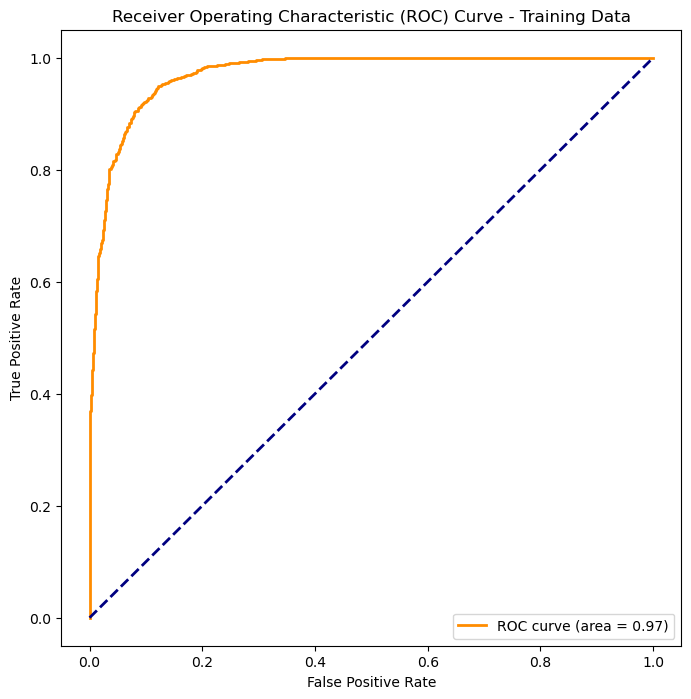

In [63]:
# Compute ROC curve and area under the curve (AUC) for training data
fpr_train, tpr_train, _ = roc_curve(Y_train_int, y_train_prob)
roc_auc_train_score = auc(fpr_train, tpr_train)

# Plot ROC curve for training data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

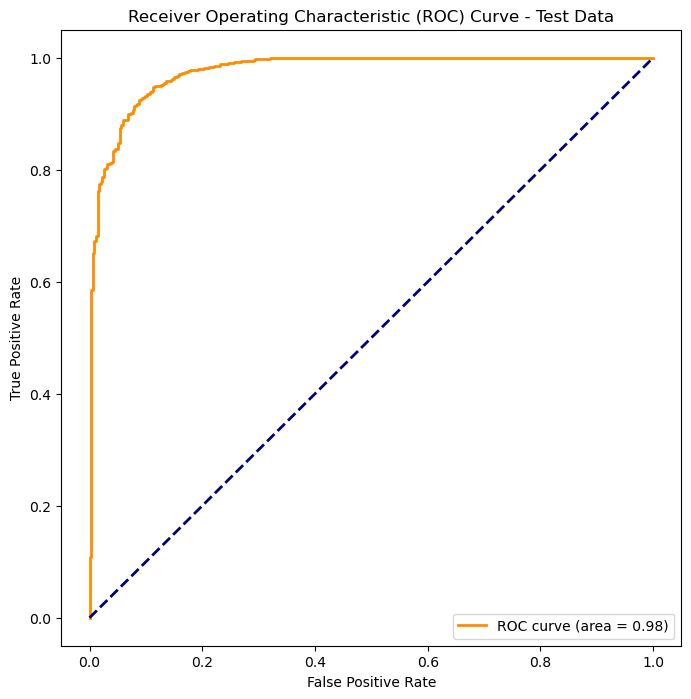

In [64]:
# Compute ROC curve and area under the curve (AUC) for test data
fpr_test, tpr_test, _ = roc_curve(Y_test_int, y_test_prob)
roc_auc_test_score = auc(fpr_test, tpr_test)

# Plot ROC curve for test data
plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()
